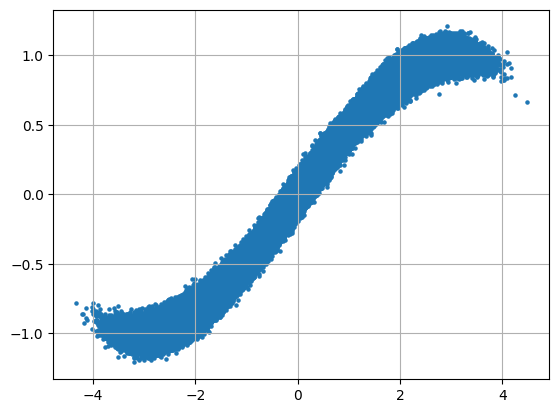

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv('dataKmeans.csv')
plt.scatter(df.x,df.y,s=5)
plt.grid()

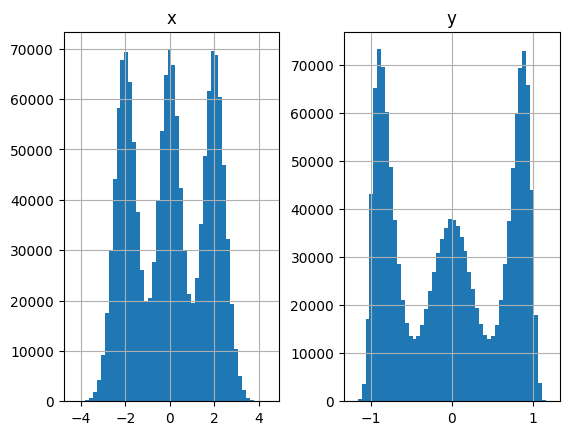

In [2]:
H = df.hist(bins = 50)

# Discretizacion

Inicializacion de los centroides

In [10]:
# 1. Seleccion de centroides
k=3
# ctr=np.random.uniform(df.x.min(),df.x.max(),k)
m=df.x.min()
M=df.x.max()
ctr=[np.random.uniform(m+(M-m)/k*i,m+(M-m)/k*(i+1)) for i in range(k)]
ctr=np.array(ctr)
ctr

array([-3.64846001,  0.15898768,  4.13833696])

Asignacion de los elementos

In [11]:
# Métrica
def distancia(ctr,obs):
    return np.abs(ctr-obs)
np.argmin(distancia(ctr,df.x[0]))

0

In [12]:
grupos=[]
for obs in df.x:
    g_idx=np.argmin(distancia(ctr,obs))
    grupos.append(g_idx)
df_copia=df.copy()
df['grupos']=grupos
df.groupby('grupos')['x'].mean()

grupos
0   -2.252656
1    0.317440
2    2.497986
Name: x, dtype: float64

In [14]:
ctr,df.groupby('grupos')['x'].mean()

(array([-3.64846001,  0.15898768,  4.13833696]),
 grupos
 0   -2.252656
 1    0.317440
 2    2.497986
 Name: x, dtype: float64)

Actualizacion de los centroides

In [15]:
ctr_anterior=ctr.copy()
ctr=df.groupby('grupos')['x'].mean().values
ctr

array([-2.25265552,  0.31744032,  2.4979856 ])

Repetir hasta encontrar los centroides optimos

In [19]:
eps=1e-4
ctr_anterior=np.ones(k)*np.inf
while(np.abs(ctr-ctr_anterior).sum()>eps):
    grupos=[]
    for obs in df.x:
        g_idx=np.argmin(distancia(ctr,obs))
        grupos.append(g_idx)
    df_copy=df.copy()
    df['grupos']=grupos
    ctr_anterior=ctr.copy()
    ctr=df.groupby('grupos')['x'].mean().values
ctr

array([-2.01017736e+00,  7.44339211e-04,  2.00995408e+00])

## Regresion lineal

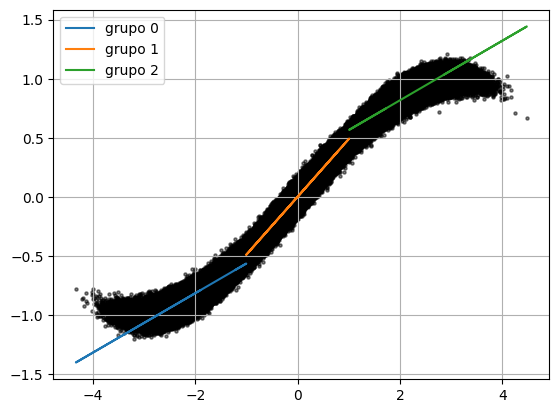

In [20]:
df['grupos']=grupos

plt.scatter(df.x,df.y,s=5,c='k',alpha=0.5)
Listlin=[]
for gr in range(k):
    x=df.groupby('grupos')['x'].get_group(gr)
    y=df.groupby('grupos')['y'].get_group(gr)
    Listlin.append(LinearRegression())
    Listlin[-1].fit(x.values.reshape(-1,1),y)

    plt.plot(x,Listlin[-1].predict(x.values.reshape(-1,1)),label='grupo '+str(gr))
plt.legend()
plt.grid()

C:\Users\isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


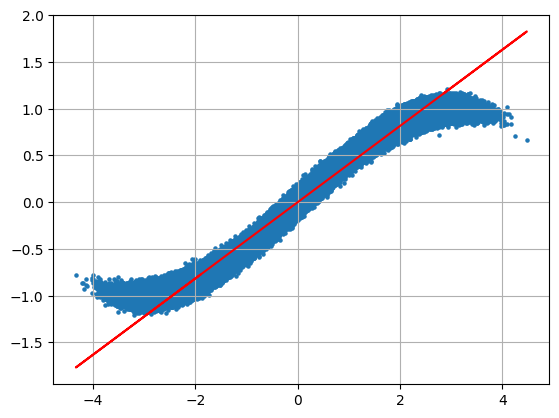

In [21]:
lin=LinearRegression()
ctr_y=df.groupby('grupos')['y'].mean()
lin.fit(ctr.reshape(-1,1),ctr_y)
plt.scatter(df.x,df.y,s=5)
plt.plot(df.x,lin.predict(df[['x']]),'r')
plt.grid()